In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)

df = pd.read_csv('files/prueba_op_master_customer_data_enmascarado_completa.csv')

print("Número de filas en cada DataFrame:")
print("prueba_op_master_customer_data_enmascarado_completa.csv", len(df))

df.head(10)

Número de filas en cada DataFrame:
prueba_op_master_customer_data_enmascarado_completa.csv 430000


,nit_enmascarado,cod_tipo_doc,tipo_cli,ctrl_terc,genero_cli,ano_nac_cli,edad_cli,estado_civil,tipo_vivienda,num_hijos,personas_dependientes,nivel_academico,ocup,act_econom,sector,subsector,declarante,total_ing,tot_activos,tot_pasivos,origen_fondos,f_vinc,f_ult_mantenimiento,canal_actualizacion,cli_actualizado,segm,subsegm,nicho,region_of,nombre_dpto_dirp,egresos_mes,tot_patrimonio,ciiu,smmlv,year,month,ingestion_day
0,536377,1,PERSONA NATURAL,CLIENTE,F,1998.0,25.0,SOLTERO,FAMILIAR,0.0,0.0,UNIVERSITARIO,ESTUDIANTE,NaN,NaN,NaN,N,2607680.0,33750000.0,0.0,OTROS,20190604,20231222,ACO,N,PERSONAL,MEDIO,MUJERES,CENTRO,SANTANDER,0.0,33750000.0,NaN,1160000.0,2023,12,31
1,512257,1,PERSONA NATURAL,CLIENTE,F,1984.0,38.0,UNION LIBRE,PROPIA,0.0,0.0,TECNOLOGO,EMPLEADO,ASALARIADO,PERSONAS,PERSONAS NATURALES,N,1000000.0,5000000.0,0.0,VENTAS NETAS,20210211,20220427,CMI,N,PERSONAL,MEDIO,MUJERES,CARIBE,MAGDALENA,250000.0,5000000.0,ASALARIADOS,1160000.0,2023,9,30
2,5788,1,PERSONA NATURAL,CLIENTE SOCIAL,M,1960.0,63.0,NaN,NaN,0.0,0.0,NaN,EMPLEADO,ASALARIADO,PERSONAS,PERSONAS NATURALES,N,0.0,0.0,0.0,SALARIO Y DEMAS PAGOS LABORALES,20200828,20220825,NaN,N,SOCIAL,NaN,NaN,DIRECCIÓN GENERAL,SIN INFORMACION,0.0,0.0,ASALARIADOS,1160000.0,2023,11,30
3,132245,1,PERSONA NATURAL,CLIENTE,F,1982.0,41.0,CASADO,NaN,1.0,0.0,TECNOLOGO,EMPLEADO,ASALARIADO,PERSONAS,PERSONAS NATURALES,N,1800000.0,62513000.0,0.0,SALARIO Y DEMAS PAGOS LABORALES,20100809,20230613,ACD,N,PERSONAL,MEDIO,MUJERES,SUR,VALLE,1000000.0,62513000.0,ASALARIADOS,1160000.0,2023,7,31
4,245279,1,PERSONA NATURAL,CLIENTE,M,1980.0,43.0,CASADO,ALQUILADA,0.0,1.0,NO INFORMA,EMPLEADO,ASALARIADO,PERSONAS,PERSONAS NATURALES,N,2500000.0,45135000.0,11000000.0,OTROS,20200901,20231019,SVP,N,PERSONAL,MEDIO,NaN,BOGOTA Y CUNDINAMARCA,CALDAS,1000000.0,34135000.0,ASALARIADOS,1160000.0,2023,12,31
5,190778,1,PERSONA NATURAL,CLIENTE,F,1979.0,43.0,UNION LIBRE,FAMILIAR,1.0,1.0,BACHILLER,INDEPENDIENTE,VENDER Y/O COMPRAR,COMERCIO,COMERCIO DE VARIEDADES Y VESTUARIO,N,1200000.0,1.0,0.0,SALARIO Y DEMAS PAGOS LABORALES,20161026,20230112,SDI,S,INDEPENDIENTES,PEQUE#O,NaN,BOGOTA Y CUNDINAMARCA,META,300000.0,1.0,"COMERCIO AL POR MENOR DE ALIMENTOS, BEBIDAS Y ...",1160000.0,2023,7,31
6,456849,1,PERSONA NATURAL,CLIENTE,F,1989.0,34.0,SOLTERO,NaN,0.0,0.0,NO INFORMA,DESEMPLEADO CON INGRESOS,ASALARIADO,PERSONAS,PERSONAS NATURALES,N,3132680.0,6896000.0,0.0,OTROS,20210707,20230619,SVP,S,PERSONAL,ALTO,MUJERES,CARIBE,BOLÍVAR,100000.0,6896000.0,ASALARIADOS,1160000.0,2023,8,31
7,552797,1,PERSONA NATURAL,CLIENTE,M,1994.0,29.0,SOLTERO,NaN,0.0,0.0,NO INFORMA,ESTUDIANTE,RENTISTA DE CAPITAL,PERSONAS,PERSONAS NATURALES,N,6095659.0,5000000.0,0.0,OTROS,20120131,20230417,SVP,N,PERSONAL,MEDIO,NaN,BOGOTA Y CUNDINAMARCA,TOLIMA,200000.0,5000000.0,RENTISTAS DE CAPITAL SÓLO PARA PERSONAS NATURALES,1160000.0,2023,9,30
8,389195,1,PERSONA NATURAL,CLIENTE,M,1993.0,30.0,SOLTERO,NaN,0.0,0.0,NaN,EMPLEADO,ASALARIADO,PERSONAS,PERSONAS NATURALES,N,3329098.0,30815744.0,450000.0,SALARIO Y DEMAS PAGOS LABORALES,20150825,20231220,CMI,N,PERSONAL,ALTO,NaN,ANTIOQUIA,ANTIOQUIA,450000.0,30365744.0,ASALARIADOS,1160000.0,2023,12,31
9,441372,1,PERSONA NATURAL,CLIENTE,F,1999.0,23.0,SOLTERO,NaN,0.0,0.0,NaN,EMPLEADO,ASALARIADO,PERSONAS,PERSONAS NATURALES,N,1.0,5507000.0,0.0,DIVIDENDOS Y PARTICIPACIONES,20191107,20230727,SDI,S,PERSONAL,BASICO,MUJERES,ANTIOQUIA,ANTIOQUIA,92000.0,5507000.0,ASALARIADOS,1160000.0,2023,8,31


In [2]:
print(df.columns)
print(df.info())
print(df.describe())

Index(['nit_enmascarado', 'cod_tipo_doc', 'tipo_cli', 'ctrl_terc',
       'genero_cli', 'ano_nac_cli', 'edad_cli', 'estado_civil',
       'tipo_vivienda', 'num_hijos', 'personas_dependientes',
       'nivel_academico', 'ocup', 'act_econom', 'sector', 'subsector',
       'declarante', 'total_ing', 'tot_activos', 'tot_pasivos',
       'origen_fondos', 'f_vinc', 'f_ult_mantenimiento', 'canal_actualizacion',
       'cli_actualizado', 'segm', 'subsegm', 'nicho', 'region_of',
       'nombre_dpto_dirp', 'egresos_mes', 'tot_patrimonio', 'ciiu', 'smmlv',
       'year', 'month', 'ingestion_day'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430000 entries, 0 to 429999
Data columns (total 37 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   nit_enmascarado        430000 non-null  int64  
 1   cod_tipo_doc           430000 non-null  int64  
 2   tipo_cli               430000 non-null  object 
 3   ctr

In [3]:
df['total_ing'] = df['total_ing'].fillna(df['total_ing'].median())

df['tot_patrimonio'] = df['tot_patrimonio'].fillna(df['tot_patrimonio'].median())

print("Valores nulos en total_ing:", df['total_ing'].isnull().sum())
print("Valores nulos en tot_patrimonio:", df['tot_patrimonio'].isnull().sum())

Valores nulos en total_ing: 0
Valores nulos en tot_patrimonio: 0


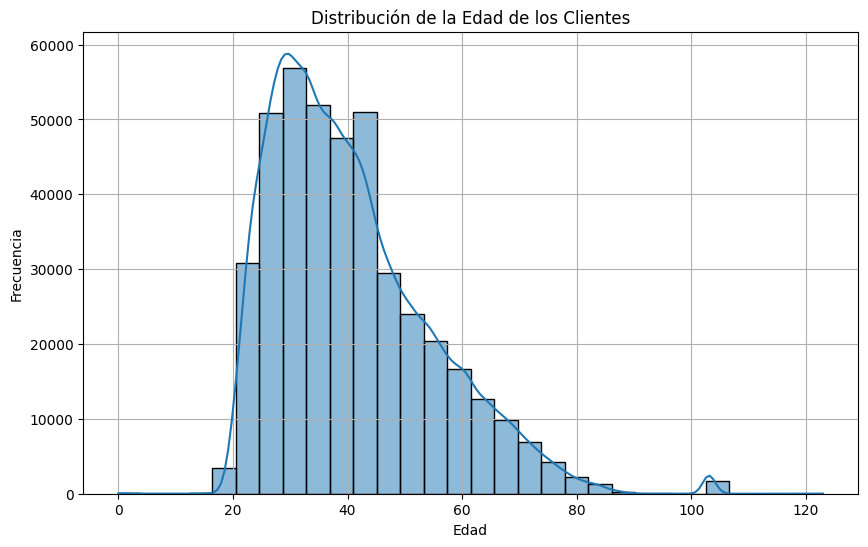

In [5]:
plt.figure(figsize=(10, 6))
sns.histplot(df['edad_cli'].dropna(), bins=30, kde=True)
plt.title('Distribución de la Edad de los Clientes')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

In [4]:
selected_columns =['nit_enmascarado', 'tot_patrimonio', 'total_ing']
df[selected_columns].isna().sum()

nit_enmascarado    0
tot_patrimonio     0
total_ing          0
dtype: int64

In [6]:
df.to_csv('processed_files/demografica.csv')

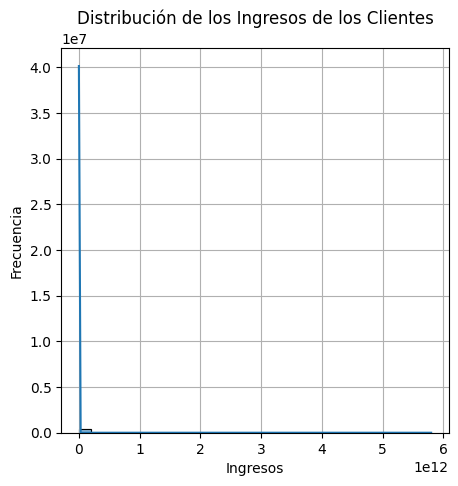

In [8]:
plt.figure(figsize=(5, 5))
sns.histplot(df['total_ing'].dropna(), bins=30, kde=True)
plt.title('Distribución de los Ingresos de los Clientes')
plt.xlabel('Ingresos')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

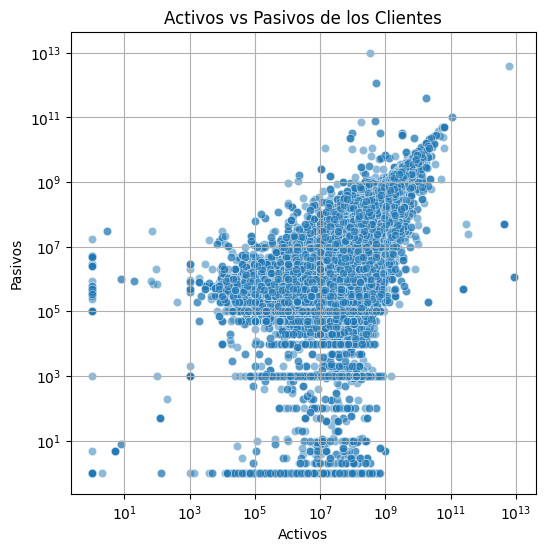

In [9]:
plt.figure(figsize=(6, 6))
sns.scatterplot(data=df, x='tot_activos', y='tot_pasivos', alpha=0.5)
plt.title('Activos vs Pasivos de los Clientes')
plt.xlabel('Activos')
plt.ylabel('Pasivos')
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.show()


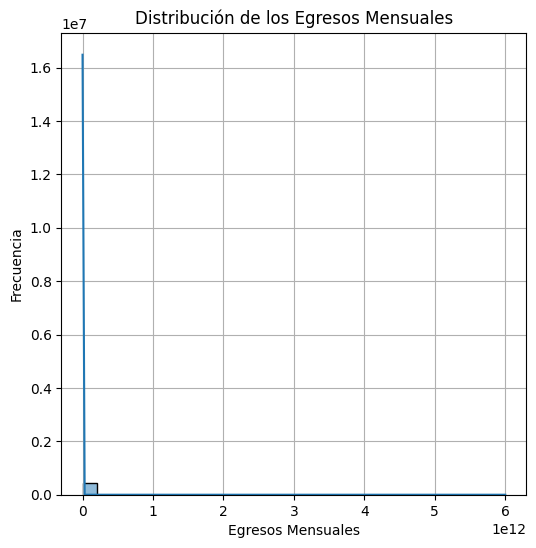

In [11]:
plt.figure(figsize=(6, 6))
sns.histplot(df['egresos_mes'].dropna(), bins=30, kde=True)
plt.title('Distribución de los Egresos Mensuales')
plt.xlabel('Egresos Mensuales')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

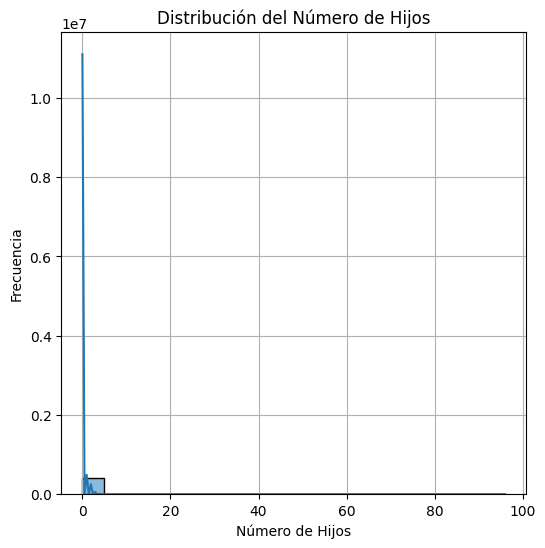

In [13]:
plt.figure(figsize=(6, 6))
sns.histplot(df['num_hijos'].dropna(), bins=20, kde=True)
plt.title('Distribución del Número de Hijos')
plt.xlabel('Número de Hijos')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

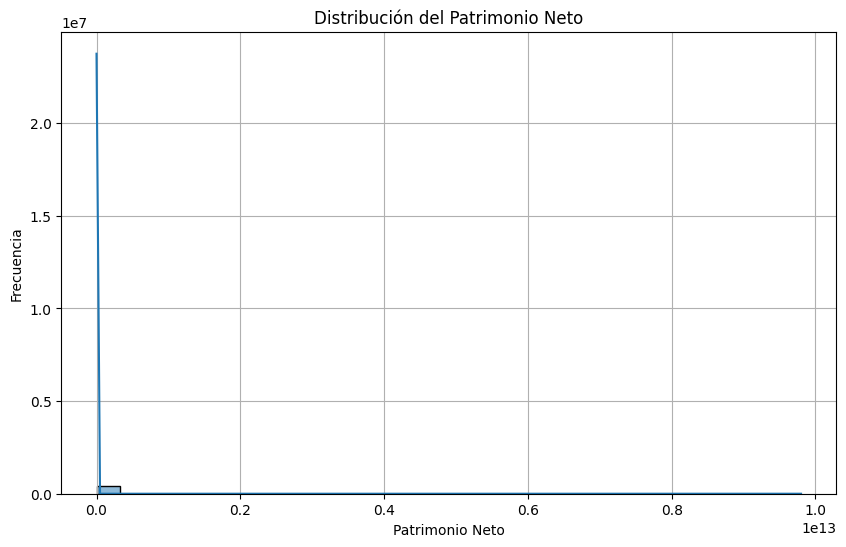

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(df['tot_patrimonio'].dropna(), bins=30, kde=True)
plt.title('Distribución del Patrimonio Neto')
plt.xlabel('Patrimonio Neto')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

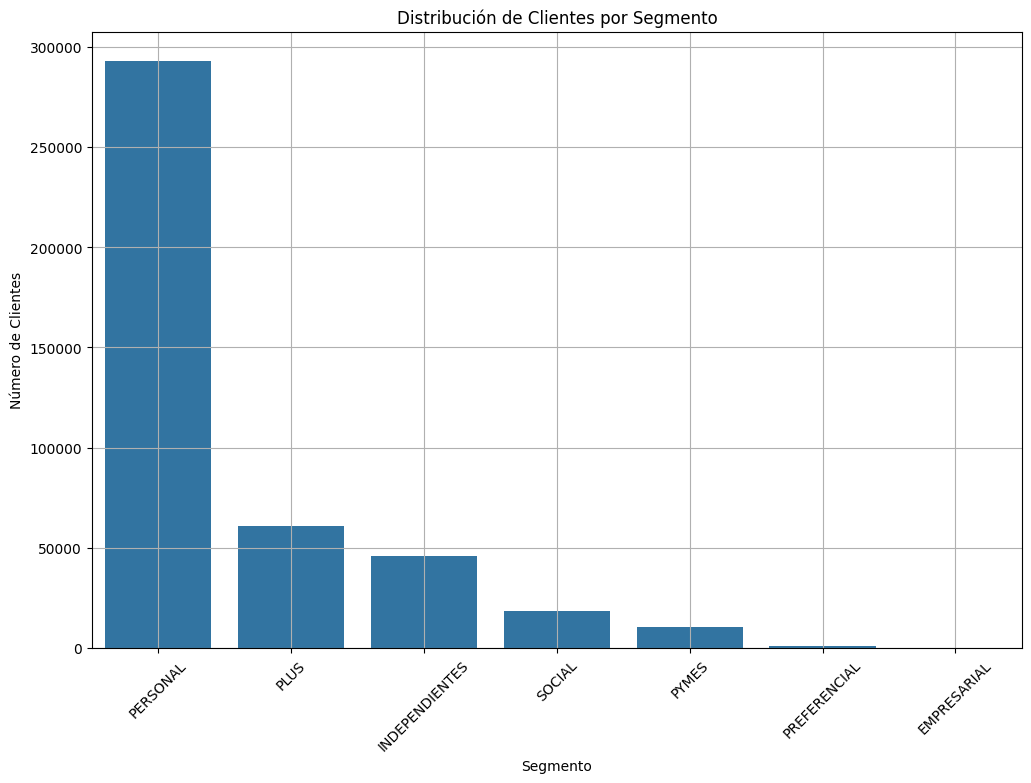

In [15]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='segm', order=df['segm'].value_counts().index)
plt.title('Distribución de Clientes por Segmento')
plt.xlabel('Segmento')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

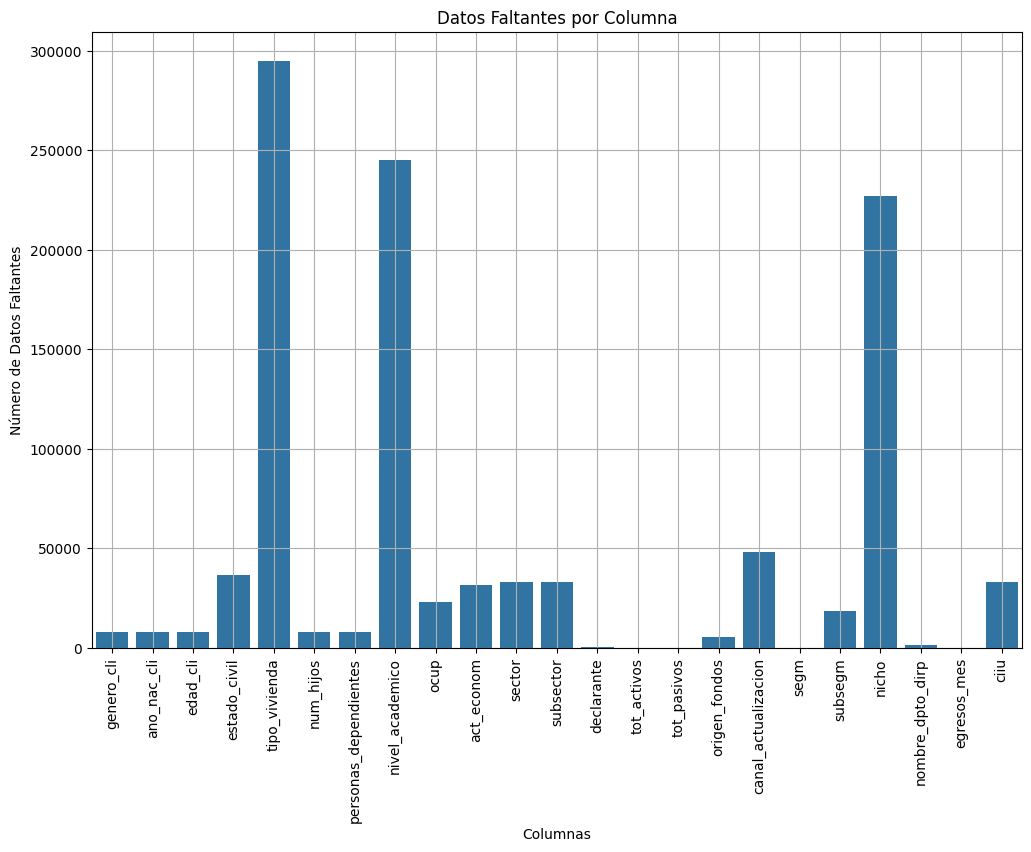

In [16]:
plt.figure(figsize=(12, 8))
missing_data = df.isnull().sum()
missing_data = missing_data[missing_data > 0]
sns.barplot(x=missing_data.index, y=missing_data.values)
plt.title('Datos Faltantes por Columna')
plt.xlabel('Columnas')
plt.ylabel('Número de Datos Faltantes')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

# Resumen del Dataset

**Cantidad de Datos**: 430,000 registros de clientes.

## Aspectos Generales


- **Edad Promedio**: 
  - La mayoría de los clientes tienen alrededor de 41 años.
  - Rango de edad: desde bebés hasta personas de 123 años.
- **Género**: 
  - Algunos datos faltantes, pero se puede estimar la distribución general.
- **Estado Civil y Educación**: 
  - Datos incompletos en buena parte.
  - Falta información sobre el estado civil y el nivel educativo de muchos clientes.


## Aspectos Financieros

- **Ingresos**: 
  - Gran variabilidad: desde poco más de un millón hasta cifras muy altas.
  - Promedio: aproximadamente 47 millones de pesos.
- **Activos y Pasivos**: 
  - Gran diversidad entre clientes.
  - Promedio de activos: ~223 millones.
  - Promedio de pasivos: ~61 millones.
- **Patrimonio**: 
  - Promedio: ~226 millones.
  - Grandes extremos en los valores.

## Aspectos de Comportamiento

- **Tipo de Vivienda**: Información incompleta.
- **Número de Hijos**: La mayoría no tiene hijos o tiene muy pocos.
- **Egresos Mensuales**: 
  - Promedio: casi 190 millones.
  - Alta variabilidad.

## Recomendaciones

1. **Segmentación de Clientes**: 
   - Usar información financiera y de comportamiento para crear perfiles.
   - Ofrecer productos más adecuados a las necesidades de cada perfil.

2. **Mejorar Datos**: 
   - Completar información faltante sobre estado civil y tipo de vivienda.
   - Objetivo: tener una visión más clara de cada cliente.

3. **Estrategias Financieras**: 
   - Utilizar la variabilidad en ingresos, activos y pasivos.
   - Crear productos financieros adaptados a la situación económica de cada cliente.

4. **Análisis de Egresos**: 
   - Comparar egresos con ingresos y activos.
   - Entender patrones de gasto de los clientes.
   - Ajustar ofertas y servicios según estos patrones.